In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn.model_selection as mod
import sklearn.metrics as metrics

%matplotlib inline

In [3]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
df.drop(['car_ID','CarName','enginelocation','fuelsystem'],axis = 1,inplace=True)

In [7]:
#one hot encode the symboling column of df
df = pd.get_dummies(df,columns=['symboling'])

In [8]:
#one hot encode the fueltype column of df
df = pd.get_dummies(df,columns=['fueltype'])

In [9]:
#one hot encode the aspiration column of df
df = pd.get_dummies(df,columns=['aspiration'])

In [10]:
#one hot encode the doornumber column of df
df = pd.get_dummies(df,columns=['doornumber'])

In [11]:
#one hot encode the carbody column of df
df = pd.get_dummies(df,columns=['carbody'])

In [12]:
#one hot encode the drivewheel column of df
df = pd.get_dummies(df,columns=['drivewheel'])

In [13]:
#one hot encode the enginetype column of df
df = pd.get_dummies(df,columns=['enginetype'])

In [14]:
df.shape

(205, 42)

In [15]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [16]:
def update_cn(x):
    if x == 'four':
        return 4
    elif x == 'six':
        return 6
    elif x == 'five':
        return 5
    elif x == 'three':
        return 3
    elif x == 'twelve':
        return 12
    elif x == 'two':
        return 2
    else:
        return 8

In [17]:

df['cylindernumber'] = df['cylindernumber'].apply(update_cn)

In [18]:
##Standardize all the attributes of df for linear regression
df = (df - df.mean()) / df.std()

In [19]:
Y = np.array(df['price']).reshape(-1,1)

In [20]:
df.drop(['price'],axis=1,inplace=True)

In [21]:
X = np.array(df)

In [22]:
## adding column of ones to X for bias
X = np.concatenate(((np.ones((len(Y),1))),X),axis=1)

In [23]:
X.shape

(205, 42)

In [24]:
Y.shape

(205, 1)

In [25]:
#initializing weight matrix for linear regression
theta = np.zeros((X.shape[1],1))

In [26]:
theta.shape

(42, 1)

In [27]:
Xtrain, Xtest, Ytrain, Ytest = mod.train_test_split(X,Y,test_size=0.2)

In [28]:
def compute_cost(x,y,theta):
    h_x = x.dot(theta)
    J = (1/2*len(y))*sum((np.square(h_x - y)))
    return J       ######This function returns the value of cost function

In [29]:
def gradient_descent(x,y,theta,alpha,iteration):
    J_hist = []
    print('descent started .......')
    for i in range(iteration):
        h_x = x.dot(theta)
        J_hist.append(compute_cost(x,y,theta))
        theta = theta -(alpha/len(y))*(np.dot(x.T,h_x-y))
    print('descent finished.')
    return theta, J_hist    ########This function is used to train our linear regression model using gradient descent t


In [40]:
final_theta, cost_history = gradient_descent(Xtrain,Ytrain,theta,0.01,200)

descent started .......
descent finished.


In [41]:
final_theta # here final_theta is the final array of regression coefficients which minimize the cost function 

array([[ 4.47622648e-05],
       [ 8.12496580e-02],
       [ 3.98721594e-02],
       [ 1.23209773e-01],
       [ 3.73503311e-02],
       [ 1.09902275e-01],
       [ 1.72894084e-01],
       [ 1.85200831e-01],
       [-4.10346133e-03],
       [-6.45003095e-03],
       [ 2.68245181e-02],
       [ 1.41923438e-01],
       [ 3.71078406e-02],
       [-3.34981665e-02],
       [-2.98066040e-02],
       [-1.60048338e-02],
       [-2.04816065e-02],
       [-7.44892080e-03],
       [ 1.13266336e-02],
       [-1.55281886e-02],
       [ 3.66734655e-02],
       [ 2.65797962e-02],
       [-2.65797962e-02],
       [-9.92008594e-04],
       [ 9.92008594e-04],
       [ 5.95976184e-04],
       [-5.95976184e-04],
       [ 9.46154948e-02],
       [ 5.79729841e-02],
       [-3.60821295e-02],
       [ 1.07629475e-02],
       [-4.71695890e-02],
       [-2.06956236e-02],
       [-6.72257033e-02],
       [ 7.73485612e-02],
       [-1.51331999e-02],
       [ 1.10097749e-02],
       [-5.23245453e-02],
       [ 1.2

In [42]:
len(cost_history)

200

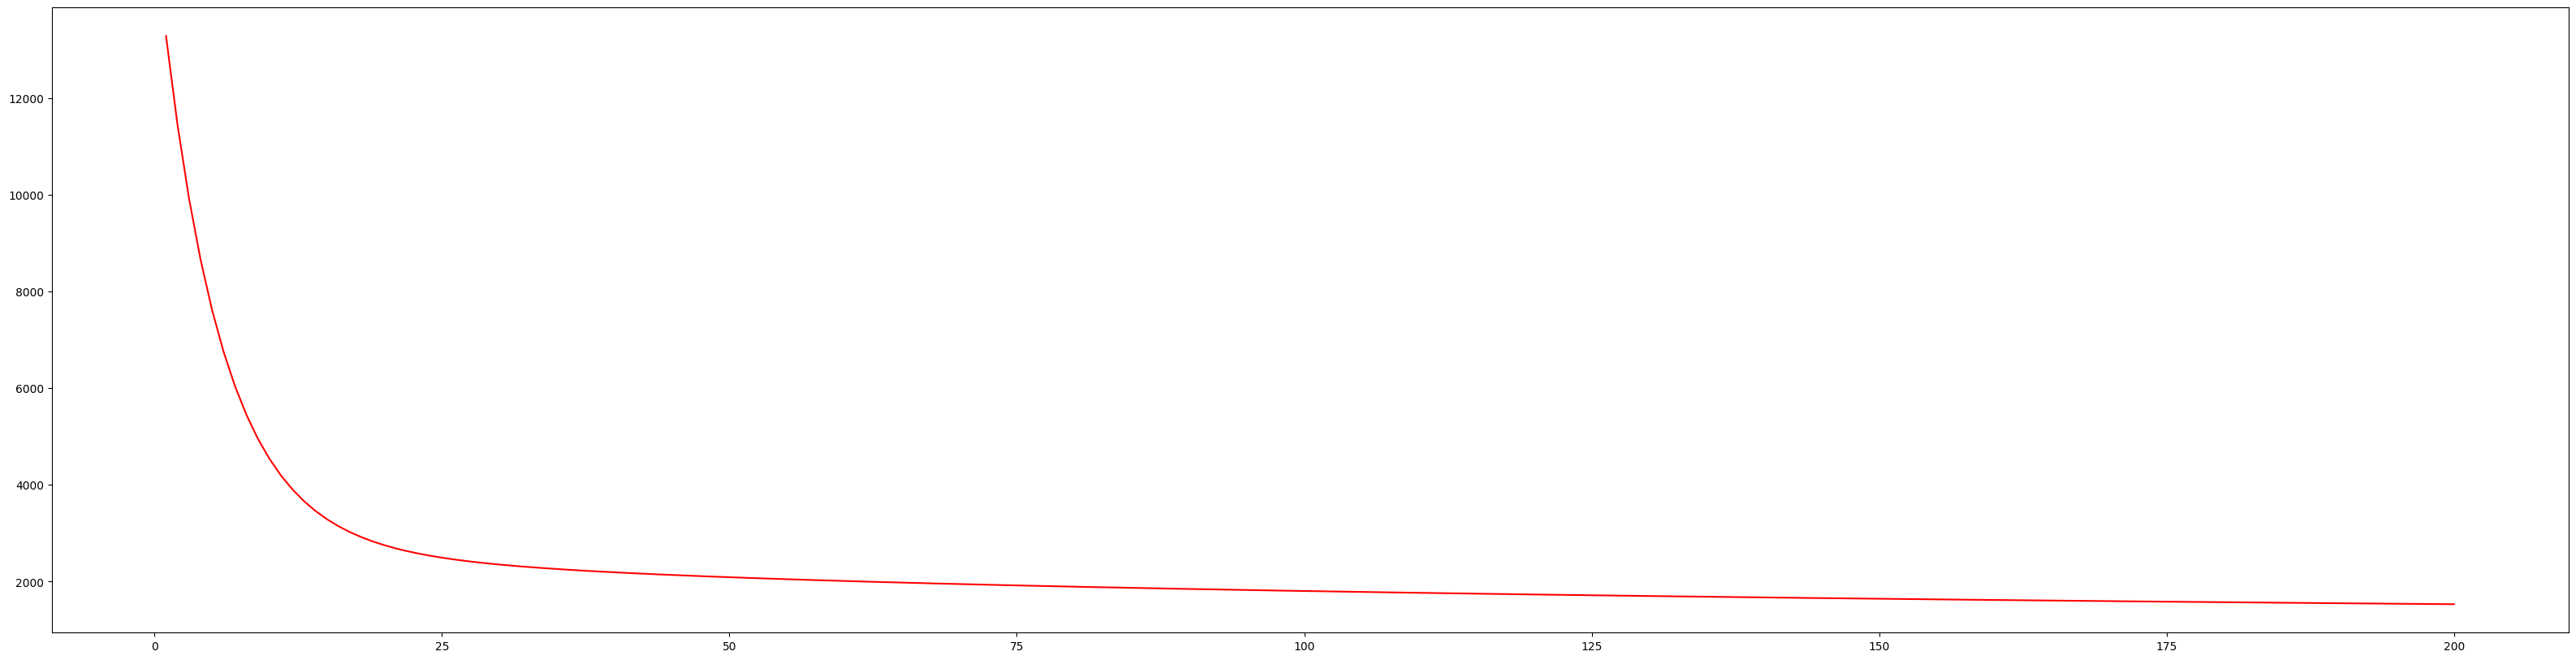

In [43]:
plt.figure(figsize=(40,10))
plt.plot(list(range(1,201)),cost_history,color='red')

In [44]:
Y_predict = Xtest.dot(final_theta)

In [45]:
Y_predict  ####Our final pediction

array([[-3.42831587e-01],
       [-6.28030744e-01],
       [-3.42084323e-01],
       [-4.80489566e-01],
       [ 7.02473529e-01],
       [-8.59194664e-01],
       [ 1.49184646e+00],
       [-1.02133184e+00],
       [-5.37427336e-01],
       [ 6.05756147e-01],
       [ 6.94614024e-01],
       [ 4.01788747e-01],
       [-8.04572520e-01],
       [-9.37440992e-01],
       [-4.11158791e-01],
       [-7.73739756e-01],
       [ 1.59438794e+00],
       [ 7.46889372e-01],
       [ 1.08992342e+00],
       [-5.13183686e-01],
       [-9.23910570e-01],
       [-4.18066416e-01],
       [ 6.66283322e-01],
       [-3.98709677e-01],
       [-2.13669109e-01],
       [ 4.30857614e-01],
       [ 4.32656286e-01],
       [ 5.97712609e-05],
       [ 1.54676368e+00],
       [ 1.73254538e+00],
       [ 8.27861905e-01],
       [-9.46247791e-01],
       [ 5.94147054e-01],
       [ 4.57967095e-01],
       [ 1.52274580e+00],
       [-5.39560695e-01],
       [-6.67497016e-01],
       [-3.92327592e-01],
       [-8.5

In [46]:
Ytest 

array([[-0.54184386],
       [-0.56312351],
       [-0.41078623],
       [-0.68867346],
       [ 0.40384893],
       [-0.68566927],
       [ 1.5365523 ],
       [-0.87393161],
       [-0.52344322],
       [ 0.45354317],
       [ 0.4754487 ],
       [ 0.40535102],
       [-0.73623974],
       [-0.84977294],
       [-0.81259614],
       [-0.97357045],
       [ 3.50967677],
       [ 1.17016676],
       [ 0.41073352],
       [-0.6307177 ],
       [-0.54578685],
       [-0.41166246],
       [ 0.14048193],
       [-0.54522357],
       [-0.17921355],
       [-0.6043059 ],
       [ 0.4034734 ],
       [ 0.27955072],
       [ 2.59753073],
       [ 1.86500999],
       [ 0.30959258],
       [-0.83888277],
       [-0.0096022 ],
       [-0.04214755],
       [ 2.18846071],
       [-0.41266385],
       [-0.77329137],
       [-0.42330368],
       [-0.82423736],
       [ 0.24700537],
       [-0.19811489]])

In [47]:
metrics.r2_score(Ytest,Y_predict)

0.7862930812296196

In [48]:
metrics.mean_squared_error(Ytest, Y_predict)**0.5

0.46702313927203637